<a href="https://colab.research.google.com/github/LDONoronha/MVP_analise_exploratoria_de_dados/blob/main/Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Carga do Dataset

In [2]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/LDONoronha/MVP_analise_exploratoria_de_dados/main/diabetes.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Mostra as primeiras linhas do dataset
dataset.head()

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
0,1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,NaN,NaN,29.0,38.0,720.0
1,1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,NaN,NaN,46.0,48.0,360.0
2,1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,185.0,92.0,49.0,57.0,180.0
3,1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,NaN,NaN,33.0,38.0,480.0
4,1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,NaN,NaN,44.0,41.0,300.0


In [3]:
# Analisando estatisticas da base de dados
pd.options.display.float_format = "{:.2f}".format
dataset.describe()

,id,chol,stab.glu,hdl,ratio,glyhb,age,height,weight,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
count,403.00,402.00,403.00,402.00,402.00,390.00,403.00,398.00,402.00,398.00,398.00,141.00,141.00,401.00,401.00,400.00
mean,15978.31,207.85,106.67,50.45,4.52,5.59,46.85,66.02,177.59,136.90,83.32,152.38,92.52,37.90,43.04,341.25
std,11881.12,44.45,53.08,17.26,1.73,2.24,16.31,3.92,40.34,22.74,13.59,21.71,11.56,5.73,5.66,309.54
min,1000.00,78.00,48.00,12.00,1.50,2.68,19.00,52.00,99.00,90.00,48.00,110.00,60.00,26.00,30.00,5.00
25%,4792.50,179.00,81.00,38.00,3.20,4.38,34.00,63.00,151.00,121.25,75.00,138.00,84.00,33.00,39.00,90.00
50%,15766.00,204.00,89.00,46.00,4.20,4.84,45.00,66.00,172.50,136.00,82.00,149.00,92.00,37.00,42.00,240.00
75%,20336.00,230.00,106.00,59.00,5.40,5.60,60.00,69.00,200.00,146.75,90.00,161.00,100.00,41.00,46.00,517.50
max,41756.00,443.00,385.00,120.00,19.30,16.11,92.00,76.00,325.00,250.00,124.00,238.00,124.00,56.00,64.00,1560.00


In [4]:
# verificando a contagem dos registros por valor
dataset["age"].value_counts()

age
40    16
43    13
41    13
36    13
38    11
      ..
81     1
24     1
92     1
83     1
89     1
Name: count, Length: 68, dtype: int64

In [5]:
#selecionando o total de registros com o valor zero
dataset[(dataset == 0).all(axis=1)].describe()

,id,chol,stab.glu,hdl,ratio,glyhb,age,height,weight,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
count,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Verificar se há colunas de cadeia de caracteres
string_columns = dataset.select_dtypes(include="object").columns

# Remover colunas de cadeia de caracteres da comparação
dataset = dataset.drop(string_columns, axis=1)



# Realize a comparação novamente
dataset = dataset[(dataset > 0.00).all(axis=1)]

In [17]:
# verificando os dados
dataset.head()

,id,chol,stab.glu,hdl,ratio,glyhb,age,height,weight,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
2,1002,228.00,92,37.00,6.20,4.64,58,61.00,256.00,190.00,92.00,185.00,92.00,49.00,57.00,180.00
6,1011,195.00,92,41.00,4.80,4.84,30,69.00,191.00,161.00,112.00,161.00,112.00,46.00,49.00,720.00
8,1016,177.00,87,49.00,3.60,4.84,45,69.00,166.00,160.00,80.00,128.00,86.00,34.00,40.00,300.00
10,1024,242.00,82,54.00,4.50,4.77,60,65.00,156.00,130.00,90.00,130.00,90.00,39.00,45.00,300.00
15,1036,213.00,83,47.00,4.50,3.41,33,65.00,157.00,130.00,90.00,120.00,96.00,37.00,41.00,240.00


## Separação em conjunto de treino e conjunto de teste com holdout

In [18]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Preparação dos dados

# Separação em bases de treino e teste (holdout)
array = dataset.values
X = array[:,0:7] # atributos
y = array[:,7] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão

# Criando os folds para a validação cruzada
scoring = 'accuracy'
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

## Modelagem e Inferência

### Criação e avaliação de modelos: linha base

LR: 0.100909 (0.094864)
KNN: 0.036364 (0.060302)
CART: 0.091818 (0.081357)
NB: 0.138182 (0.108772)
SVM: 0.121818 (0.074545)
Bagging: 0.073636 (0.054915)
RF: 0.110000 (0.067842)
ET: 0.083636 (0.028108)
Ada: 0.110909 (0.067640)
GB: 0.110909 (0.081088)
Voting: 0.112727 (0.094142)


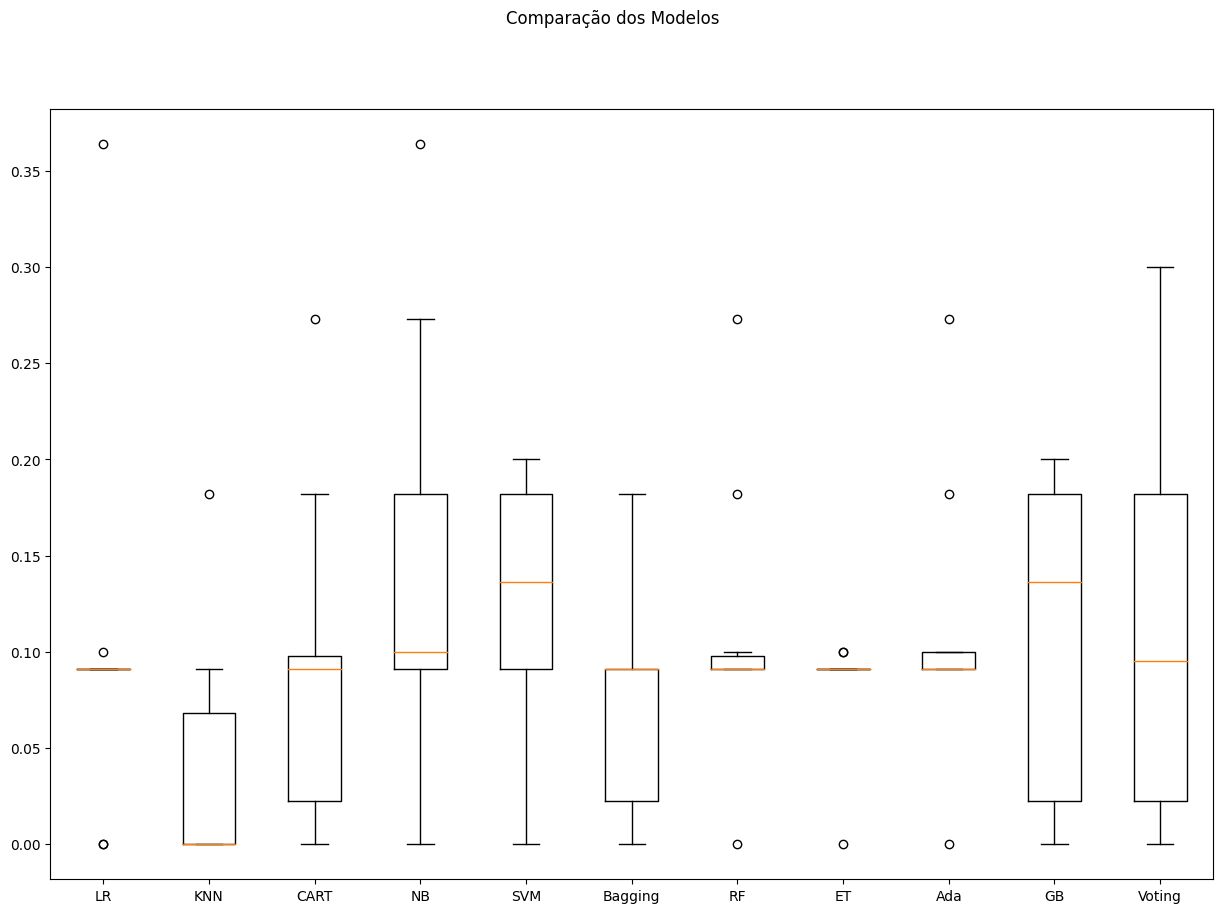

In [19]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring= scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

LR-orig: 0.101 (0.095)
KNN-orig: 0.036 (0.060)
CART-orig: 0.092 (0.081)
NB-orig: 0.138 (0.109)
SVM-orig: 0.122 (0.075)
Bag-orig: 0.074 (0.055)
RF-orig: 0.110 (0.068)
ET-orig: 0.084 (0.028)
Ada-orig: 0.111 (0.068)
GB-orig: 0.111 (0.081)
Vot-orig: 0.113 (0.094)
LR-padr: 0.064 (0.042)
KNN-padr: 0.065 (0.042)
CART-padr: 0.139 (0.106)
NB-padr: 0.138 (0.109)
SVM-padr: 0.101 (0.049)
Bag-padr: 0.110 (0.079)
RF-padr: 0.110 (0.079)
ET-padr: 0.092 (0.058)
Ada-padr: 0.111 (0.068)
GB-padr: 0.111 (0.099)
Vot-padr: 0.074 (0.037)
LR-norm: 0.119 (0.071)
KNN-norm: 0.092 (0.041)
CART-norm: 0.110 (0.068)
NB-norm: 0.138 (0.109)
SVM-norm: 0.120 (0.041)
Bag-norm: 0.118 (0.100)
RF-norm: 0.119 (0.071)
ET-norm: 0.065 (0.042)
Ada-norm: 0.111 (0.068)
GB-norm: 0.093 (0.093)
Vot-norm: 0.130 (0.062)


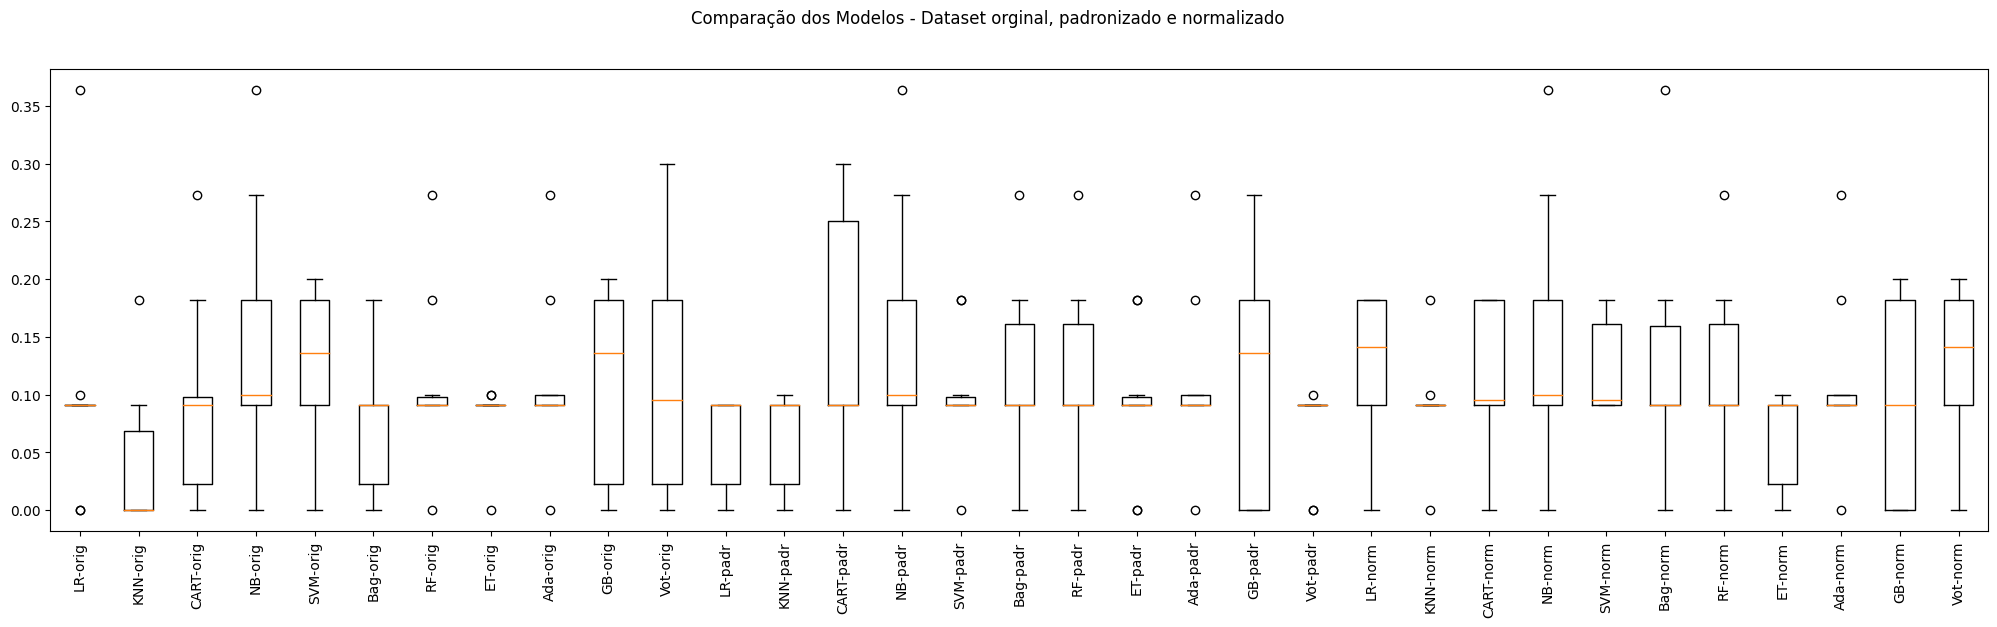

In [20]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros

In [21]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.120000 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}
Sem tratamento de missings: knn-padr - Melhor: 0.093636 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}
Sem tratamento de missings: knn-norm - Melhor: 0.101818 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 5}


## Finalização do Modelo

In [22]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = LogisticRegression(max_iter=200)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.10714285714285714


In [23]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

LogisticRegression(max_iter=200)

## Simulando a aplicação do modelo em dados não vistos

In [26]:
# Novos dados - não sabemos a classe!
data = {'id':  [123213, 234523, 123123],
        'chol': [80, 100, 110],
        'stab.glu': [200, 500, 700],
        'hdl': [35, 78, 23],
        'ratio': [9.32442, 4.2834, 5.567567],
        'glyhb': [5.5, 6.7, 3.3],
        'age': [68,59,10]
        }

atributos = ['id','chol', 'stab.glu' , 'hdl' , 'ratio' , 'glyhb' , 'age' ]
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:8].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[ 7.55883793 -2.86581202  1.45383304 -0.86016297  2.23674811 -0.1778138
   1.07573481]
 [15.57549311 -2.4508749   6.60237815  1.50812002 -0.23570382  0.30455343
   0.49594643]
 [ 7.55235604 -2.24340634 10.03474155 -1.52107916  0.3941372  -1.06215372
  -2.66067917]]


In [27]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[58. 58. 73.]
